# APIs + OAI-PMH



### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
```

In [2]:
import xml.etree.ElementTree as ET
import requests
import json

## Parte 1 - APIs - Swagger
Vamos a utilizar el ejemplo de la tienda de mascotas en swagger:
https://petstore.swagger.io

#### Ejercicio 1 - Lista 10 mascotas registradas

200
[{"id":1234567,"category":{"id":12,"name":"tyiuy"},"name":"Zulfin","photoUrls":["abs","yin"],"tags":[{"id":123,"name":"ipyiy"},{"id":789,"name":"lkhg"}],"status":"available"},{"id":1245,"category":{"id":1245,"name":"xyz"},"name":"xyz","photoUrls":["test"],"tags":[],"status":"available"},{"id":111111122221975,"name":"Dars d'kotel","photoUrls":[],"tags":[],"status":"available"},{"id":868,"category":{"id":0,"name":"lalala"},"name":"Loki","photoUrls":["Varshava"],"tags":[{"id":0,"name":"string"}],"status":"available"},{"id":207,"category":{"id":1,"name":"koala"},"name":"Zoi","photoUrls":["string"],"tags":[{"id":1,"name":"wuuu"}],"status":"available"},{"id":587,"category":{"id":1,"name":"cat"},"name":"Kai","photoUrls":["string"],"tags":[{"id":1,"name":"mjauu"}],"status":"available"},{"id":794,"category":{"id":1,"name":"doggo"},"name":"Lesi","photoUrls":["string"],"tags":[{"id":1,"name":"wuuuuf"}],"status":"available"},{"id":9223372036854775000,"name":"doggie","photoUrls":["string"],"tag
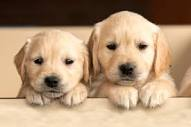

In [37]:
header = {'Accept': 'application/json'}
try:
    req = requests.get('https://petstore.swagger.io/v2/pet/findByStatus?status=available&status=pending&status=sold', headers=header)
    print(req.status_code)
    print(req.text)
    data = json.loads(req.text)
    # print(data)
    for values in data:
        print(values['id'],values['name'])
except Exception as e:
    print("Error inesperado:", e)

#### Ejercicio 2 - Registra una nueva mascota mascota

In [34]:
header = {'Accept': 'application/json', 'Content-Type': 'application/json'}
json_data = {
  "id": 999,
  "category": {
    "id": 1,
    "name": "categorymascota"
  },
  "name": "Pipo",
  "photoUrls": [
    "photoMascota"
  ],
  "tags": [
    {
      "id": 999,
      "name": "tagMascota"
    }
  ],
  "status": "available"
}
try:
  json_data_val = json.dumps(json_data)
  req = requests.post('https://petstore.swagger.io/v2/pet', data = json_data_val, headers=header)
  print(req.status_code)
  print("Mascota añadida:", req.text)
except Exception as e:
  print("Error al añadir mascota:", e)




200
Mascota añadida: {"id":999,"category":{"id":1,"name":"categorymascota"},"name":"Pipo","photoUrls":["photoMascota"],"tags":[{"id":999,"name":"tagMascota"}],"status":"available"}


#### Ejercico 3 - Encuentra la mascota registrada con su ID

In [38]:
try:
    header = {'Accept': 'application/json'}
    req = requests.get('https://petstore.swagger.io/v2/pet/999', headers=header)
    print(req.status_code)
    print(req.text)
    data = json.loads(req.text)
except Exception as e:
    print("Error inesperado:", e)

200
{"id":999,"category":{"id":1,"name":"categorymascota"},"name":"Pipo","photoUrls":["photoMascota"],"tags":[{"id":999,"name":"tagMascota"}],"status":"available"}


## Parte 2 - OAI-PMH
La documentación del protocolo la podéis encontrar aquí:

https://www.openarchives.org/OAI/openarchivesprotocol.html

### Identify

This verb is used to retrieve information about a repository. Some of the information returned is required as part of the OAI-PMH. Repositories may also employ the Identify verb to return additional descriptive information.

In [39]:
import xml.etree.ElementTree as ET
import requests

base_url = "https://zenodo.org/oai2d"
action = "?verb=Identify"
print("Request to: %s%s" % (base_url, action))
oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)
print(oai.text)
#Iterator para recorrer todos los elementos (incluso anidados)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

#Findall para encontrar un elemento específico
namespaces = {'ns': 'http://www.openarchives.org/OAI/2.0/'} # add more as needed
elementos = xmlTree.findall('.//ns:baseURL',namespaces)
print(elementos) #Element
for e in elementos:
    print("BaseURL:", e.text)

Request to: https://zenodo.org/oai2d?verb=Identify
<?xml version='1.0' encoding='UTF-8'?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2023-11-30T15:28:40Z</responseDate>
  <request verb="Identify">https://zenodo.org/oai2d</request>
  <Identify>
    <repositoryName>Zenodo</repositoryName>
    <baseURL>https://zenodo.org/oai2d</baseURL>
    <protocolVersion>2.0</protocolVersion>
    <adminEmail>info@zenodo.org</adminEmail>
    <earliestDatestamp>2014-02-03T14:41:33Z</earliestDatestamp>
    <deletedRecord>no</deletedRecord>
    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>
  </Identify>
</OAI-PMH>

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2023-11-30T15:28:40Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.

### Listar tipos de metadatos

ListMetadataFormats

This verb is used to retrieve the metadata formats available from a repository. An optional argument restricts the request to the formats available for a specific item.


In [40]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListMetadataFormats'

oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2023-11-30T15:30:18Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats: 
    
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: https://www.loc.gov/standards/marcxml/
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.openarchives.org/OAI/2.0/oai_dc/
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2

Podemos capturar sólo la información relevante

In [41]:
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix') or (elem.tag == '{http://www.openarchives.org/OAI/2.0/}schema'):
        print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: dcat
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marc21
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/oai/oai-1.1/oai.xsd
{http://www.openarchives.or

O de forma más "elegante"

In [42]:
for e in xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}metadataFormat'):
    metadataPrefix = e.find('{http://www.openarchives.org/OAI/2.0/}metadataPrefix').text
    schema = e.find('{http://www.openarchives.org/OAI/2.0/}schema').text
    print(metadataPrefix, ':', schema)

marcxml : https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
dcat : http://schema.datacite.org/meta/kernel-4/metadata.xsd
marc21 : https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
datacite : http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
oai_datacite : http://schema.datacite.org/oai/oai-1.1/oai.xsd
datacite4 : http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
oai_datacite4 : http://schema.datacite.org/oai/oai-1.1/oai.xsd


Podemos describir el último schema

In [44]:
oai_datacite = requests.get('http://schema.datacite.org/meta/kernel-4.1/metadata.xsd') #Peticion al servidor
print(oai_datacite.text)

#Para crear el arbol XML
xmlTree = ET.fromstring(oai_datacite.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Revision history
  2010-08-26 Complete revision according to new common specification by the metadata work group after review. AJH, DTIC
  2010-11-17 Revised to current state of kernel review, FZ, TIB
  2011-01-17 Complete revsion after community review. FZ, TIB
  2011-03-17 Release of v2.1: added a namespace; mandatory properties got minLength; changes in the definitions of relationTypes IsDocumentedBy/Documents and isCompiledBy/Compiles; changes type of property "Date" from xs:date to xs:string. FZ, TIB
  2011-06-27 v2.2: namespace: kernel-2.2, additions to controlled lists "resourceType", "contributorType", "relatedIdentifierType", and "descriptionType". Removal of intermediate include-files.
  2013-07-24 v3.0: namespace: kernel-3.0; delete LastMetadataUpdate & MetadateVersionNumber; additions to controlled lists "contributorType", "dateType", "descriptionType", "relationType", "relatedIdentifierType" & "resourceType"; deletion of "StartDa

Si analizamos la descripción del estándar, vemos que las etiquetas de los metadatos están almacenados en la etiqueta "element", en el atributo "name". Podemos obetener un listado de lo que esperamos encontrar

In [45]:
namespaces = {'xs' : 'http://www.w3.org/2001/XMLSchema'}
for tags in xmlTree.findall('.//xs:element',namespaces):
    print ('Metadato: ',tags.attrib['name'])

Metadato:  resource
Metadato:  identifier
Metadato:  creators
Metadato:  creator
Metadato:  creatorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  titles
Metadato:  title
Metadato:  publisher
Metadato:  publicationYear
Metadato:  resourceType
Metadato:  subjects
Metadato:  subject
Metadato:  contributors
Metadato:  contributor
Metadato:  contributorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  dates
Metadato:  date
Metadato:  language
Metadato:  alternateIdentifiers
Metadato:  alternateIdentifier
Metadato:  relatedIdentifiers
Metadato:  relatedIdentifier
Metadato:  sizes
Metadato:  size
Metadato:  formats
Metadato:  format
Metadato:  version
Metadato:  rightsList
Metadato:  rights
Metadato:  descriptions
Metadato:  description
Metadato:  br
Metadato:  geoLocations
Metadato:  geoLocation
Metadato:  geoLocationPlace
Metadato:  geoLocationPoint
Metadato:  geoLocationBo

### ListIdentifiers

This verb is an abbreviated form of ListRecords, retrieving only headers rather than records. Optional arguments permit selective harvesting of headers based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted.

Devuelve la cabecera de los registros, para conocer la información esencial.

Necesita el prefijo del formato de metadatos

In [46]:
#prefijo: oai_datacite4
base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListIdentifiers'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text) #Identifiers are really important because they are used to ask more information

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2023-11-30T15:35:36Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3668903
{http://www.openarchives.org/OAI/2.0/}datestamp: 2020-02-17T07:20:57Z
{http://www.openarchives.org/OAI/2.0/}setSpec: software
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:1299291
{http://www.openarchives.org/OAI/2.0/}datestamp: 2020-01-20T14:47:57Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:openaire.cern.ch:1060
{http://www.openarchives.org/OAI/2.0/}datestamp: 2020-01-20T15:32:29Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}i

### ListRecords

Listar los registros

This verb is used to harvest records from a repository. Optional arguments permit selective harvesting of records based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted. No metadata will be present for records with deleted status.

In [47]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)

xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2023-11-30T15:36:17Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3668903
{http://www.openarchives.org/OAI/2.0/}datestamp
2020-02-17T07:20:57Z
{http://www.openarchives.org/OAI/2.0/}setSpec
software
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.1/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.1/}schemaVersion
4.3
{http://schema.datacite.org/oai/oai-1.1/}datacentreSymbol
None
{http://schema.datacite.org/oai/oai-1.1/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3668903
{http:

## Ejercicio 1

Muestra sólo el identificador y las palabras clave (subject)

In [22]:
#prefijo: oai_datacite4
import requests
import xml.etree.ElementTree as ET
base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)
xmlTree = ET.fromstring(oai.text)
for elem in xmlTree.iter():
    for el in elem:
        identifier = el.find('{http://www.openarchives.org/OAI/2.0/}identifier')
        if identifier is not None:
            print("Identifier:", identifier.tag, identifier.text)
        subjects_list = el.find('{http://datacite.org/schema/kernel-4}subjects')
        if subjects_list is not None:
            subjects = 'Subjects: '
            for subject in subjects_list:
                subjects = subjects + subject.text + ', '
            print(subjects[:-1])

Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:3668903
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:1299291
Subjects: ANALYSIS OF MANAGEMENT OF ORAL ANTICOAGULATION THERAPY AFTER GASTROINTESTINAL BLEEDING: A TRANSLATIONAL STUDY,
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:openaire.cern.ch:1060
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:153857
Subjects: Azilsartan medoxil, Reverse phase, Stability indicating, Chromatography.,
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:1459073
Subjects: Antimicrobial resistance, isolates of microorganisms, milk, cows, subclinical mastitis,
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:1197453
Subjects: maltreatment, body mass index, parenting style,khat (Catha edulis),care and supervisory neglect,
Identifier: {http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:1225552


## Filtros

Registros entre dos fechas

In [ ]:
import xml.etree.ElementTree as ET

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'
bounds = "&from='2019-01-01'&until='2019-12-31'" #Para filtrar por fechas

oai = requests.get(base_url + action + params + bounds)
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

### GetRecord

This verb is used to retrieve an individual metadata record from a repository. Required arguments specify the identifier of the item from which the record is requested and the format of the metadata that should be included in the record. Depending on the level at which a repository tracks deletions, a header with a "deleted" value for the status attribute may be returned, in case the metadata format specified by the metadataPrefix is no longer available from the repository or from the specified item.

Obtener objeto digital de ese recurso

In [ ]:
import xml.etree.ElementTree as ET
import urllib

base_url = 'https://zenodo.org/oai2d'
action = '?verb=GetRecord'
params =  '&metadataPrefix=oai_datacite4&identifier=oai:zenodo.org:3363479'
print(base_url + action + params)
oai = requests.get(base_url + action + params)
print(oai.text)
xmlTree = ET.fromstring(oai.text)
ns = {'oai' : 'http://www.openarchives.org/OAI/2.0/'}

#iterator = xmlTree.iter()
#for elem in iterator:
 #   print(elem.tag)
 #   print(elem.text)

for tags in xmlTree.findall('.//',ns):
    print (tags.tag+": ",tags.text)

## APIs específicas

El protocolo OAI-PMH ofrece una serie de funcionalidades genéricas e interoperables entre distintos repositorios. Sin embargo, existen ciertas limitaciones que no nos permiten automatizar todo lo necesario para analizar un gran número de dataset. Para ello, tenemos que recurrir a APIs específicas de los repositorios con los que trabajamos.

Zenodo proporciona una API bastante completa que complementa al protocolo OAI-PMH. En el siguiente enlace podemos ver su especificación y algunos ejemplos con curl y python.

http://developers.zenodo.org/

Entre otras cosas, podemos automatizar el proceso de publicación, descargar archivos, etc.

También, obteniendo el DOI de un recurso, podemos resolverlo para obtener cierta información específica, como la URL del objeto digital entre otras.

In [93]:
import json
#Buscamos datasets específicos-
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=datacite3')
oaiTree = ET.fromstring(oai.text)
#for i in oaiTree.iter():
#    print(i.tag)
records = oaiTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')
for e in records:
    for subject in e.findall('.//{http://datacite.org/schema/kernel-3}subject'):
        if "Animalia" in subject.text:
            print("Title: "+e.findall('.//{http://datacite.org/schema/kernel-3}title')[0].text)
            identifier = e.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text
            print(identifier)
            print('\n')
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/958140',headers)
record = json.loads(r.text)
print(record['files'])

    

[{'id': '9da9a79e-b7a4-4d47-9c87-073041f86283', 'key': 'oo_32747.jpg', 'size': 1085074, 'checksum': 'md5:89a9f58721a73523c1ae855025b81ad4', 'links': {'self': 'https://zenodo.org/api/records/958140/files/oo_32747.jpg/content'}}]


Puedes mostrar directamente la imagen

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt


# URL de la imagen
url = record['files'][0]['links']['self']

# Realizar la petición GET a la URL
respuesta = requests.get(url)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    with open('imagen_test.jpg', 'wb') as f:
        f.write(respuesta.content)
img = Image.open('imagen_test.jpg')
plt.imshow(img)
plt.axis('off')  # No mostrar ejes
plt.show()

# Ejercicio

* 1: Busca al menos dos repositorios digitales compatibles con OAI-PMH
* 2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes filtrar por la descripción o en las palabras clave).
* 3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.
* 4: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías?
* 5: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...). 

In [104]:
#1, 2, 3
import requests
import xml.etree.ElementTree as ET

repo1 = 'https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi'
repo2 = 'http://export.arxiv.org/oai2'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_dc'

oai1 = requests.get(repo1 + action + params)
oai2 = requests.get(repo2 + action + params)
xmlTree1 = ET.fromstring(oai1.text)
xmlTree2 = ET.fromstring(oai2.text)
for el in xmlTree2.findall('{http://www.openarchives.org/OAI/2.0/}ListRecords/{http://www.openarchives.org/OAI/2.0/}record'):
    description = el.find('{http://www.openarchives.org/OAI/2.0/}metadata/{http://www.openarchives.org/OAI/2.0/oai_dc/}dc/{http://purl.org/dc/elements/1.1/}description').text
    if 'Efficient control of a laser welding process requires the reliable prediction\nof process behavior. A statistical method of field modeling, based on\nnormalized RBFNN, can be successfully used to predict the spatiotemporal\ndynamics of surface optical activity in the laser welding process. In this\narticle we demonstrate how to optimize RBFNN to maximize prediction quality.\nSpecial attention is paid to the structure of sample vectors, which represent\nthe bridge between the field distributions in the past and future.' in description:
        identifier1 = el.find('{http://www.openarchives.org/OAI/2.0/}header/{http://www.openarchives.org/OAI/2.0/}identifier')
        title = ''
        identifiers = ''
        for e in el.iter('{http://www.openarchives.org/OAI/2.0/}metadata'):
            for m in e.iter('{http://purl.org/dc/elements/1.1/}title'):
                title = m.text
            for i in e.iter('{http://purl.org/dc/elements/1.1/}identifier'):
                identifiers += i.text + ', '
        print("Record:")
        if identifier1 is not None:
            print("Identifier:", identifier1.text)
        if title is not None:
            print("Title:", title)
        if identifiers is not None:
            print("Identifiers:", identifiers)

for el in xmlTree1.findall('{http://www.openarchives.org/OAI/2.0/}ListRecords/{http://www.openarchives.org/OAI/2.0/}record'):
    description = el.find('{http://www.openarchives.org/OAI/2.0/}metadata/{http://www.openarchives.org/OAI/2.0/oai_dc/}dc/{http://purl.org/dc/elements/1.1/}description').text
    if 'Patients with abnormal breast findings (n = 413) were examined by mammography, sonography and magnetic resonance (MR) mammography; 185 invasive cancers, 38 carcinoma in situ and 254 benign tumours were confirmed histologically. Sensitivity for mammography was 83.7%, for sonography it was 89.1% and for MR mammography it was 94.6% for invasive cancers. In 42 patients with multifocal invasive cancers, multifocality had been detected by mammography and sonography in 26.2%, and by MR mammography in 66.7%. In nine patients with multicentric cancers, detection rates were 55.5, 55.5 and 88.8%, respectively. Carcinoma in situ was diagnosed by mammography in 78.9% and by MR mammography in 68.4% of patients. Combination of all three diagnostic methods lead to the best results for detection of invasive cancer and multifocal disease. However, sensitivity of mammography and sonography combined was identical to that of MR mammography (ie 94.6%).' in description:
        identifier1 = el.find('{http://www.openarchives.org/OAI/2.0/}header/{http://www.openarchives.org/OAI/2.0/}identifier')
        title = ''
        identifiers = ''
        for e in el.iter('{http://www.openarchives.org/OAI/2.0/}metadata'):
            for m in e.iter('{http://purl.org/dc/elements/1.1/}title'):
                title = m.text
            for i in e.iter('{http://purl.org/dc/elements/1.1/}identifier'):
                identifiers += i.text + ', '
        print("Record:")
        if identifier1 is not None:
            print("Identifier:", identifier1.text)
        if title is not None:
            print("Title:", title)
        if identifiers is not None:
            print("Identifiers:", identifiers)



Record:
Identifier: oai:arXiv.org:0704.0611
Title: Modeling the field of laser welding melt pool by RBFNN
Identifiers: http://arxiv.org/abs/0704.0611, 
Record:
Identifier: oai:pubmedcentral.nih.gov:13900
Title: Comparison of written reports of mammography, sonography and magnetic resonance mammography for preoperative evaluation of breast lesions, with special emphasis on magnetic resonance mammography
Identifiers: /pmc/articles/PMC13900/, /pubmed/11250746, 


In [84]:
#4
'He encontrado el problema de que no me ha sido tan sencillo trabajar con este método, puesto que hay que diferenciar entre distintos formatos. Me ha parecido más complejo que en anteriores prácticas, a parte de la mayor longitud de los recursos con los que se trata.'

'He encontrado el problema de que no me ha sido tan sencillo trabajar con este método, puesto que hay que diferenciar entre distintos formatos. Me ha parecido más complejo que en anteriores prácticas, a parte de la mayor longitud de los recursos con los que se trata.'

oai:arXiv.org:0704.0611
[{'id': '9da9a79e-b7a4-4d47-9c87-073041f86283', 'key': 'oo_32747.jpg', 'size': 1085074, 'checksum': 'md5:89a9f58721a73523c1ae855025b81ad4', 'links': {'self': 'https://zenodo.org/api/records/958140/files/oo_32747.jpg/content'}}]


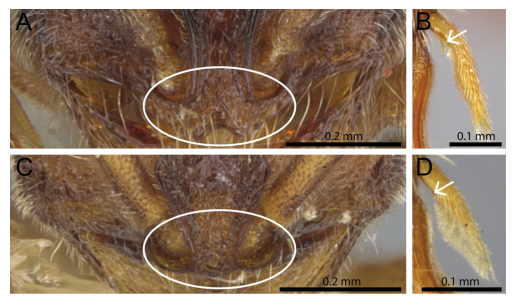

In [101]:
#5

import requests
from PIL import Image
import matplotlib.pyplot as plt
identifier = ''
for el in xmlTree2.findall('{http://www.openarchives.org/OAI/2.0/}ListRecords/{http://www.openarchives.org/OAI/2.0/}record'):
    description = el.find('{http://www.openarchives.org/OAI/2.0/}metadata/{http://www.openarchives.org/OAI/2.0/oai_dc/}dc/{http://purl.org/dc/elements/1.1/}description').text
    # print(description)
    if 'Efficient control of a laser welding process requires the reliable prediction\nof process behavior. A statistical method of field modeling, based on\nnormalized RBFNN, can be successfully used to predict the spatiotemporal\ndynamics of surface optical activity in the laser welding process. In this\narticle we demonstrate how to optimize RBFNN to maximize prediction quality.\nSpecial attention is paid to the structure of sample vectors, which represent\nthe bridge between the field distributions in the past and future.' in description:
        identifier = el.find('{http://www.openarchives.org/OAI/2.0/}header/{http://www.openarchives.org/OAI/2.0/}identifier').text
        for e in el.iter('{http://www.openarchives.org/OAI/2.0/}metadata'):
            for i in e.iter('{http://purl.org/dc/elements/1.1/}identifier'):
                identifiers += i.text + ', '
        identifiersArray = identifiers.split(', ')
print(identifier)
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/958140',headers)
record = json.loads(r.text)
print(record['files'])
url = record['files'][0]['links']['self']

respuesta = requests.get(url)
if respuesta.status_code == 200:
    with open('imagen_test.jpg', 'wb') as f:
        f.write(respuesta.content)
img = Image.open('imagen_test.jpg')
plt.imshow(img)
plt.axis('off')  # No mostrar ejes
plt.show()